# **Predicting Fuel Economy**

The aim of this project is to build a linear regression model to predict vehicle fuel efficiency (**mpg**) based on automobile characteristics such as weight, model year, and acceleration, providing insights into factors that impact fuel economy.



In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import KFold


In [2]:
# Importing Dataset
from google.colab import files
uploaded = files.upload()


Saving auto-mpg.csv to auto-mpg.csv


In [3]:
# Reading the auto-mpg file
mpg = pd.read_csv("auto-mpg.csv")

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Dataset Overview:

- mpg: Miles per gallon, representing vehicle's fuel efficiency
- cylinders: Number of cylinders in the vehicle
- displacement: This represents the total volume of the engine
- horsepower: Relates to the power of engine
- weight: The total weight of the car
- acceleration: The time (in seconds) it takes for the vehicle to reach a speed of 60 miles per hour (mph).
- model year: The year the car model was introduced
- origin: Indicates the manufacturing region of the vehicle: 1: United States, 2: Europe, 3: Japan

In [5]:
mpg.shape

(398, 9)

Dataframe has 398 rows and 9 columns

In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
# Converting the origin column to a "object" data type

mpg["origin"] = mpg["origin"].astype("object")

In [8]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [9]:
# Determining why "horsepower" is an object datatype

mpg["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [11]:
mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors="coerce")

In [12]:
mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [13]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
# Fill in the missing values with the mean value of horsepower in the entire dataset

mpg["horsepower"] = mpg["horsepower"].fillna(mpg["horsepower"].mean())

In [15]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [16]:
mpg.duplicated().sum()

0

In [17]:
mpg.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [18]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [19]:
# Unique values in the dataset

mpg.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,94
weight,351
acceleration,95
model year,13
origin,3
car name,305


<Axes: xlabel='mpg', ylabel='Count'>

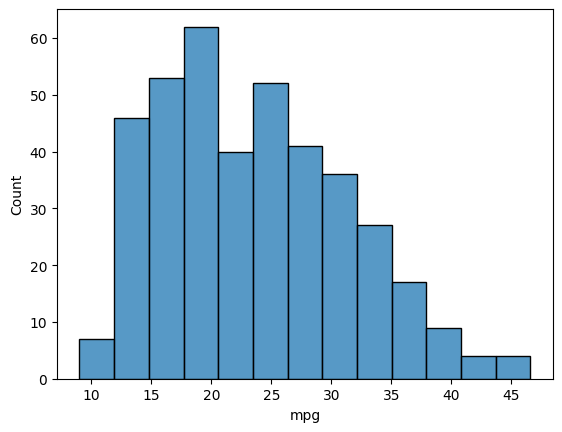

In [20]:
sns.histplot(mpg["mpg"])

This target column is slightly right skewed, but overall it has a fairly normal shape.

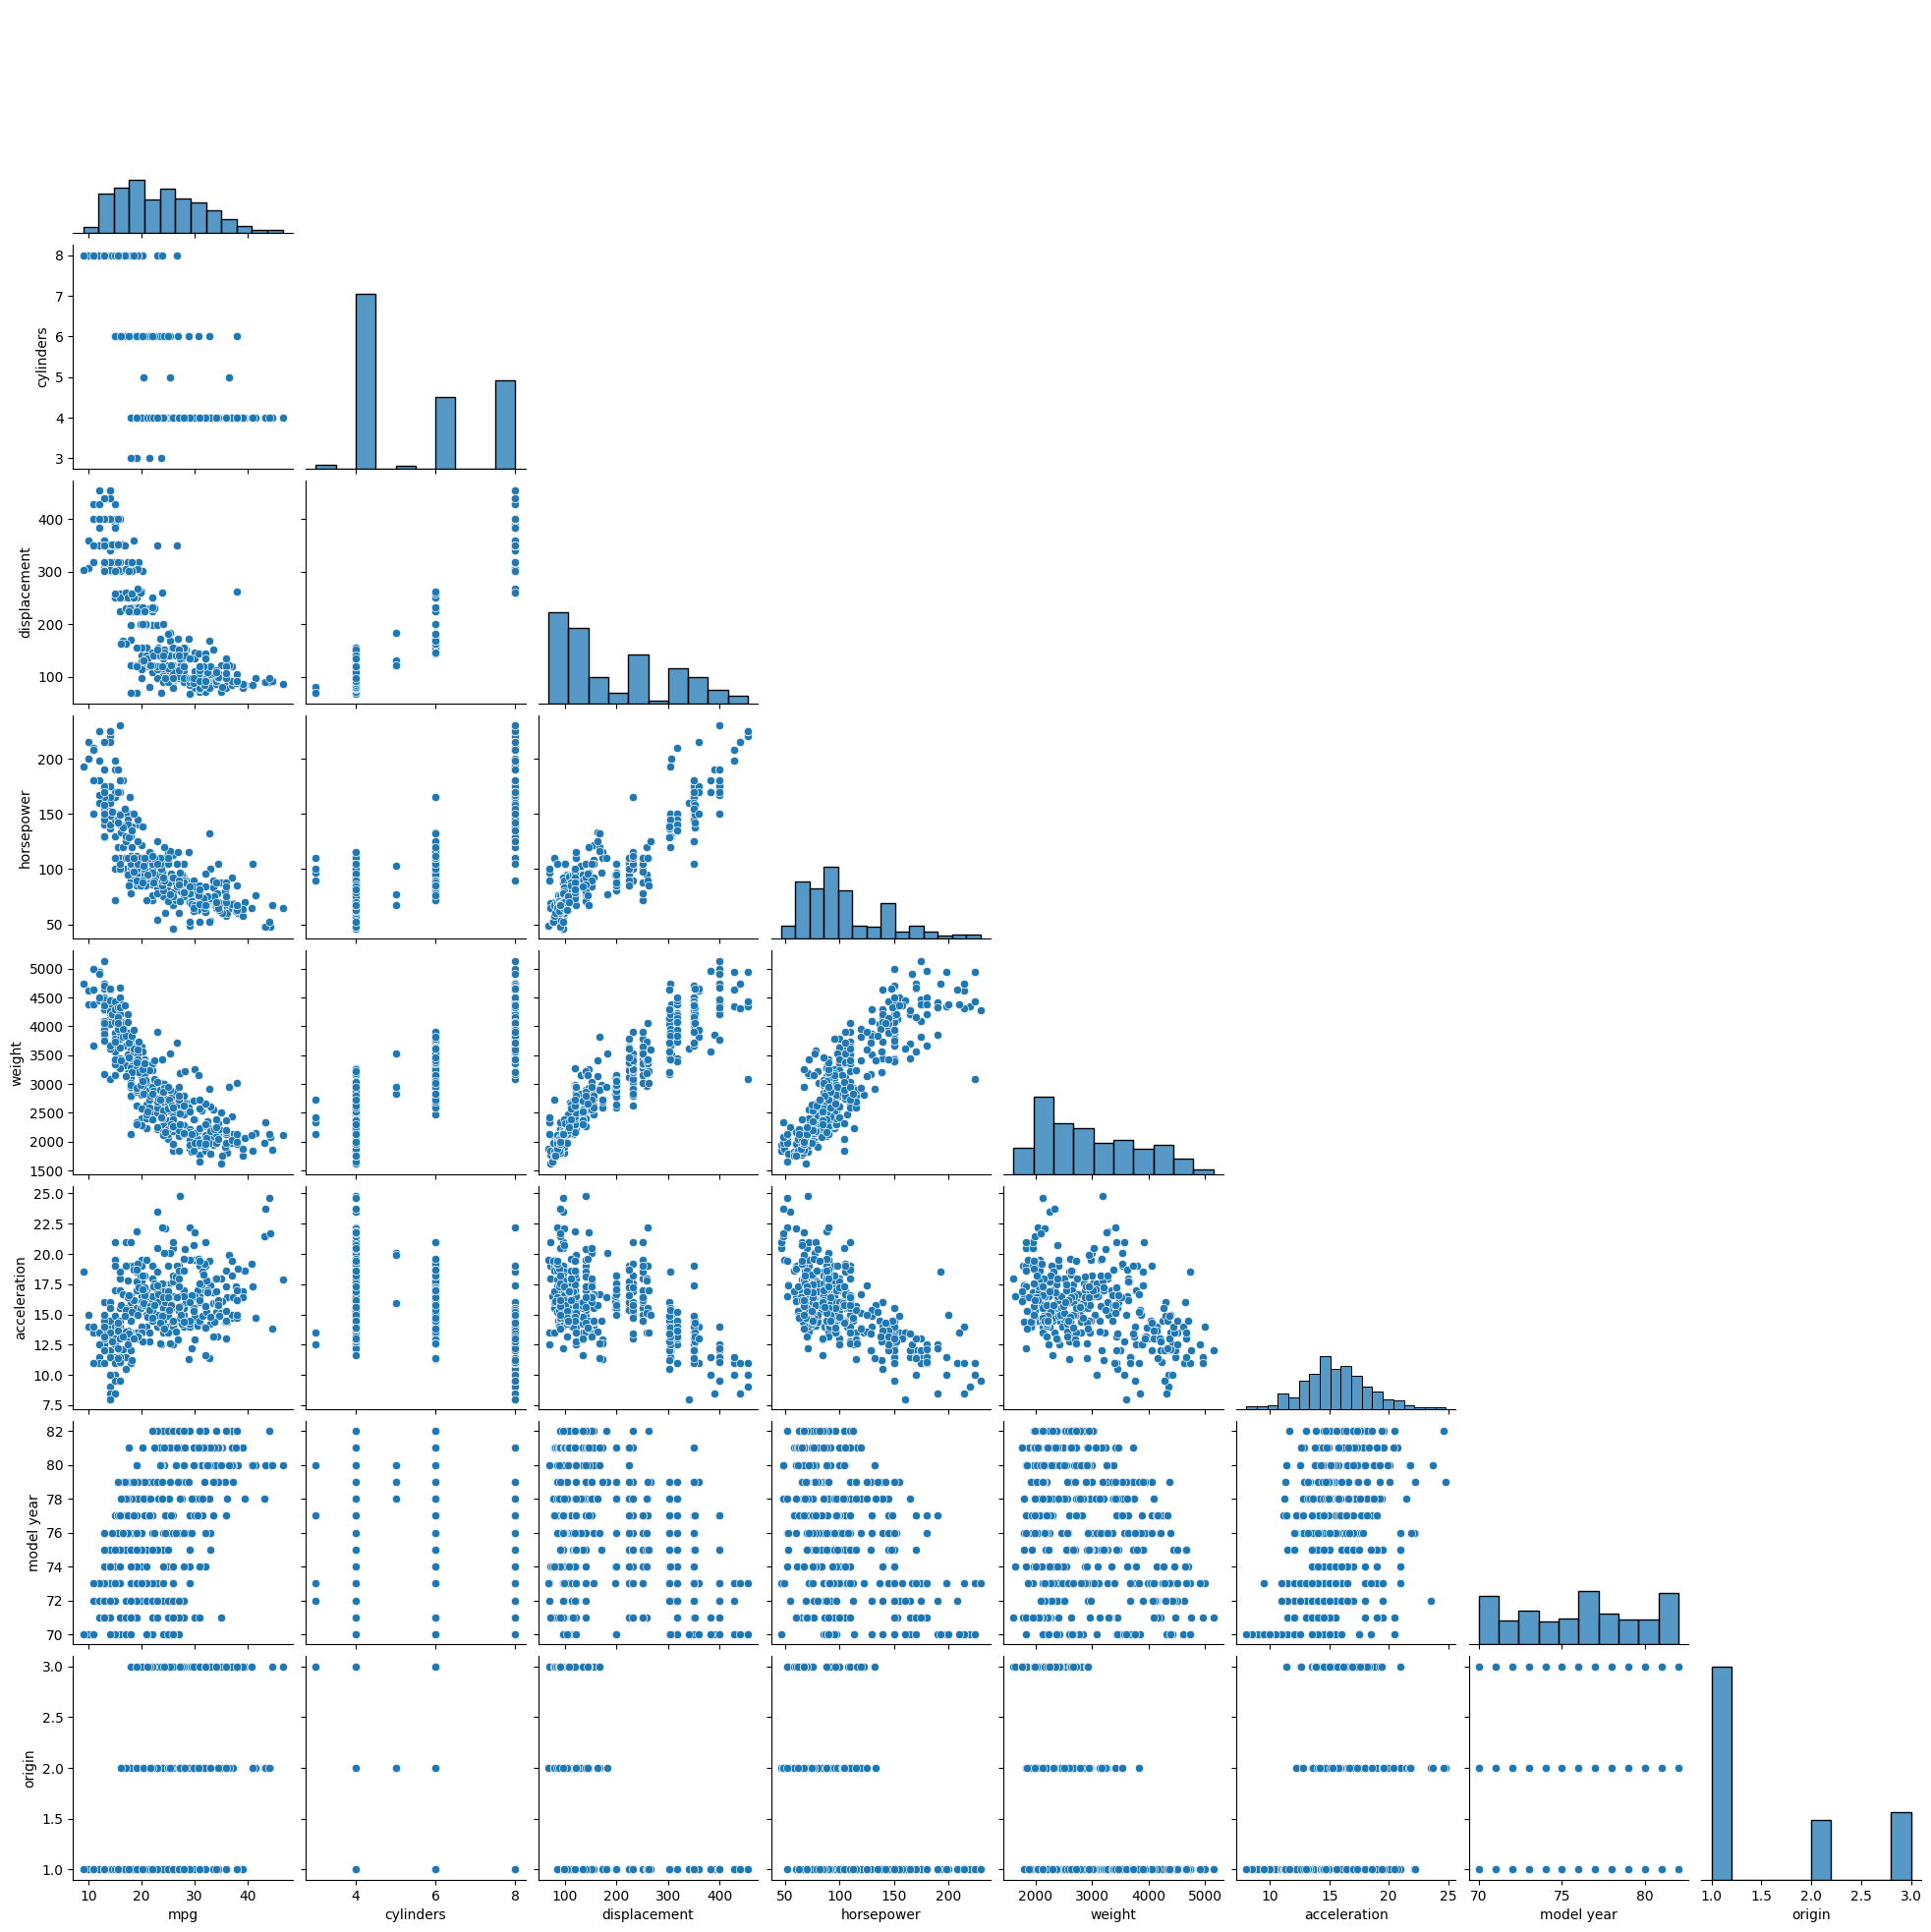

In [21]:
# Exploring relationship between all the features

sns.pairplot(mpg, corner=True)

<Axes: xlabel='origin', ylabel='mpg'>

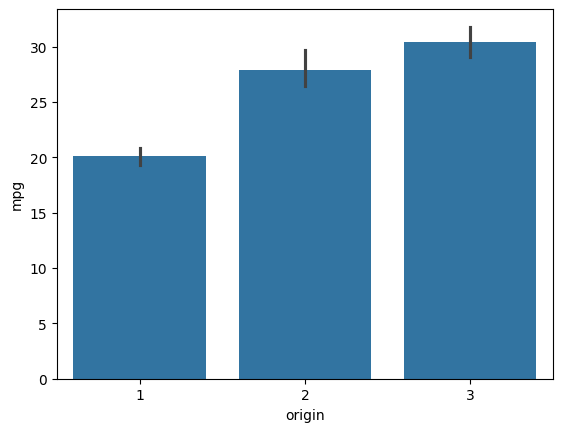

In [22]:
sns.barplot(data=mpg, x="origin", y="mpg")

In [23]:
# Checking Correlation

mpg.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


<Axes: >

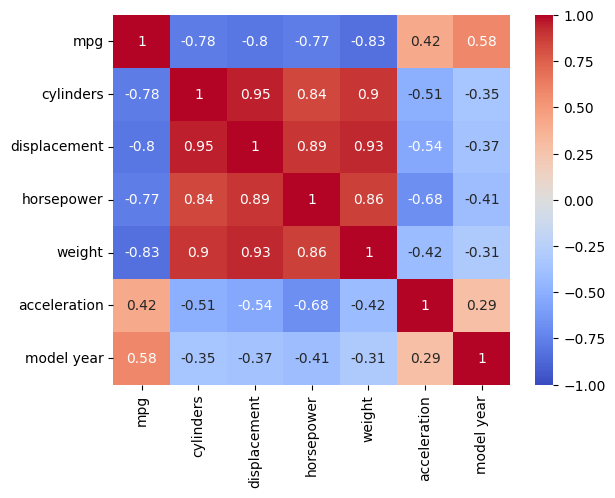

In [24]:
sns.heatmap(mpg.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            cmap="coolwarm",
            annot=True)

- The strongest negative correlation is observed between **mpg** and **weight**, followed by **displacement**, **cylinders**, and **horsepower**.  
- Several features, including **weight**, **displacement**, **cylinders**, and **horsepower**, exhibit high positive correlations with each other.  
- The weakest correlation exists between **mpg** and **acceleration**.  



#### Fitting Baseline Regression Model using the highest correlated feature: Weight

In [25]:
features = ["weight"]
x = sm.add_constant(mpg[features])
y = mpg["mpg"]
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

In [26]:
# as the data set is small i am using cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 2023)

#create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(x,y):
    # Subset data based on CV folds
    x_train, y_train = x.iloc[train_ind], y.iloc[train_ind]
    x_val, y_val = x.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, x_train).fit()
    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(x_val),))
    cv_lm_mae.append(mae(y_val, model.predict(x_val),))

print('All Validations R2s: ', [round(x, 3) for x in cv_lm_r2s])
print(f'Cross Validations R2s: {round(np.mean(cv_lm_r2s),3)} +-  {round(np.std(cv_lm_r2s),3)}')

print('All Validations MAEs: ', [round(x, 3) for x in cv_lm_mae])
print(f'Cross Validations MAEs: {round(np.mean(cv_lm_mae),3)} +-  {round(np.std(cv_lm_mae),3)}')

All Validations R2s:  [0.775, 0.7, 0.645, 0.603, 0.662]
Cross Validations R2s: 0.677 +-  0.058
All Validations MAEs:  [2.805, 3.249, 3.498, 3.735, 3.635]
Cross Validations MAEs: 3.384 +-  0.333


In [27]:
# Residual Analysis
def residual_analysis_plots(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")

    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")



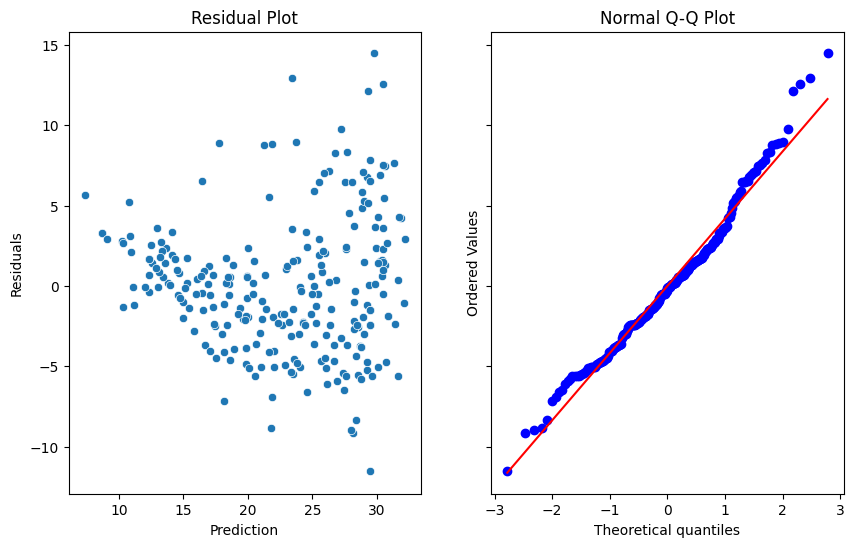

In [28]:
residual_analysis_plots(model)

In [29]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     561.3
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           3.65e-66
Time:                        18:05:12   Log-Likelihood:                -727.24
No. Observations:                 255   AIC:                             1458.
Df Residuals:                     253   BIC:                             1466.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1117      0.981     45.993      0.0

In [30]:
print(f"Test R-Squared: {r2(y_test, model.predict(x_test),)}")
print(f"Test MAE: {mae(y_test, model.predict(x_test),)}")

Test R-Squared: 0.6680917622639904
Test MAE: 3.0685743966587076


#### Feature Engineering for Multiple Regression

In [31]:
mpg_model = mpg.assign(
    weight2 = mpg["weight"]**2
).drop("car name", axis = 1)

mpg_model = pd.get_dummies(mpg_model, drop_first=True, dtype=int)

In [32]:
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,0,0


#### Multiple Regression

In [33]:

# Data Splitting
features = [
    "weight",
    "weight2",
    "cylinders",
    "displacement",
    "horsepower",
    "acceleration",
    "model year",
    "origin_2",
    "origin_3"
    ]

x = sm.add_constant(mpg_model[features])
y = mpg_model["mpg"]
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

In [34]:
# as the data set is small i am using cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 2023)

#create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(x,y):
    # Subset data based on CV folds
    x_train, y_train = x.iloc[train_ind], y.iloc[train_ind]
    x_val, y_val = x.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, x_train).fit()
    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(x_val),))
    cv_lm_mae.append(mae(y_val, model.predict(x_val),))

print('All Validations R2s: ', [round(x, 3) for x in cv_lm_r2s])
print(f'Cross Validations R2s: {round(np.mean(cv_lm_r2s),3)} +-  {round(np.std(cv_lm_r2s),3)}')

print('All Validations MAEs: ', [round(x, 3) for x in cv_lm_mae])
print(f'Cross Validations MAEs: {round(np.mean(cv_lm_mae),3)} +-  {round(np.std(cv_lm_mae),3)}')

All Validations R2s:  [0.888, 0.846, 0.838, 0.845, 0.84]
Cross Validations R2s: 0.851 +-  0.018
All Validations MAEs:  [1.814, 2.388, 2.406, 2.17, 2.387]
Cross Validations MAEs: 2.233 +-  0.227


In [35]:
def residual_analysis_plots(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")

    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

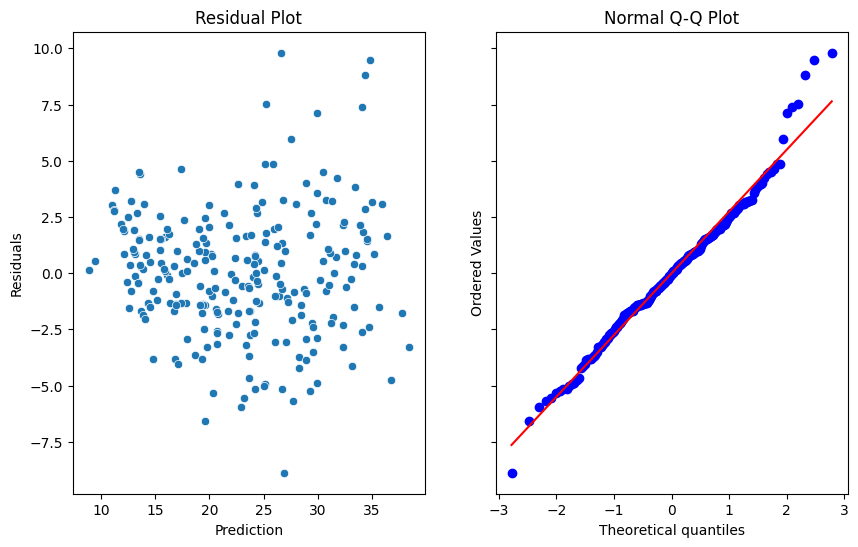

In [36]:
residual_analysis_plots(model)

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          1.01e-101
Time:                        18:05:13   Log-Likelihood:                -619.73
No. Observations:                 255   AIC:                             1259.
Df Residuals:                     245   BIC:                             1295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3469      5.554      0.062   

In [38]:
print(f"Test R-Squared: {r2(y_test, model.predict(x_test),)}")
print(f"Test MAE: {mae(y_test, model.predict(x_test),)}")

Test R-Squared: 0.8202079139202556
Test MAE: 2.29191817727269


In [39]:
features = [
    "weight",
    "weight2",
    #"cylinders",
    #"displacement",
    #"horsepower",
    #"acceleration",
    "model year",
    "origin_2",
    "origin_3"
    ]

x = sm.add_constant(mpg_model[features])
y = mpg_model["mpg"]
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

In [40]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2023)

#create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(x,y):
    # Subset data based on CV folds
    x_train, y_train = x.iloc[train_ind], y.iloc[train_ind]
    x_val, y_val = x.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, x_train).fit()
    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(x_val),))
    cv_lm_mae.append(mae(y_val, model.predict(x_val),))

print('All Validations R2s: ', [round(x, 3) for x in cv_lm_r2s])
print(f'Cross Validations R2s: {round(np.mean(cv_lm_r2s),3)} +-  {round(np.std(cv_lm_r2s),3)}')

print('All Validations MAEs: ', [round(x, 3) for x in cv_lm_mae])
print(f'Cross Validations MAEs: {round(np.mean(cv_lm_mae),3)} +-  {round(np.std(cv_lm_mae),3)}')

All Validations R2s:  [0.881, 0.866, 0.835, 0.84, 0.837]
Cross Validations R2s: 0.852 +-  0.019
All Validations MAEs:  [1.879, 2.244, 2.396, 2.209, 2.394]
Cross Validations MAEs: 2.224 +-  0.189


In [41]:
def residual_analysis_plots(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")

    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

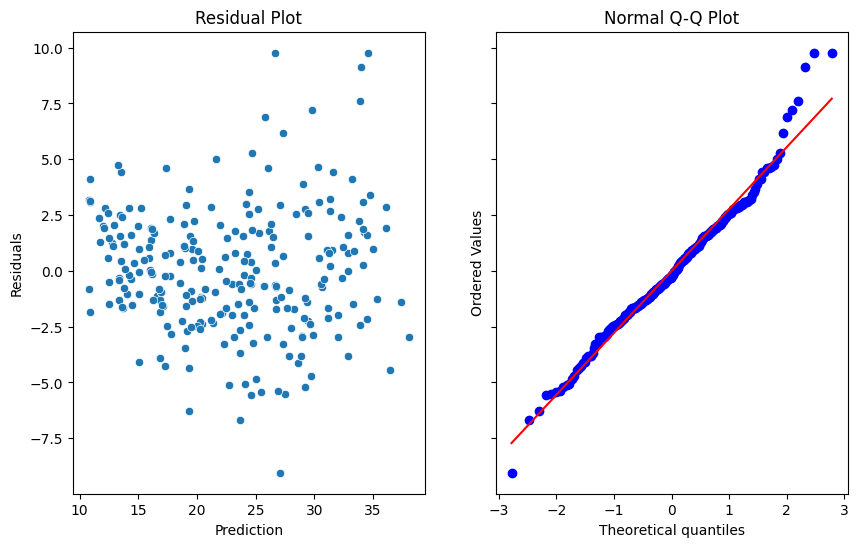

In [42]:
residual_analysis_plots(model)

In [43]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     315.3
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          1.66e-105
Time:                        18:05:13   Log-Likelihood:                -622.28
No. Observations:                 255   AIC:                             1257.
Df Residuals:                     249   BIC:                             1278.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0302      4.725     -0.430      0.6

In [44]:
print(f"Test R-Squared: {r2(y_test, model.predict(x_test),)}")
print(f"Test MAE: {mae(y_test, model.predict(x_test),)}")

Test R-Squared: 0.815854867173227
Test MAE: 2.277774876205366


#### Ridge Regression for comparison

In [45]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_tr = std.fit_transform(x.values)
x_te = std.transform(x_test.values)

In [46]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(x_tr, y)
print(ridge_model.score(x_tr, y))
print(mae(y, ridge_model.predict(x_tr)))
print(ridge_model.alpha_)

0.8636076715003522
2.185175897898561
0.03001835813575589
